The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


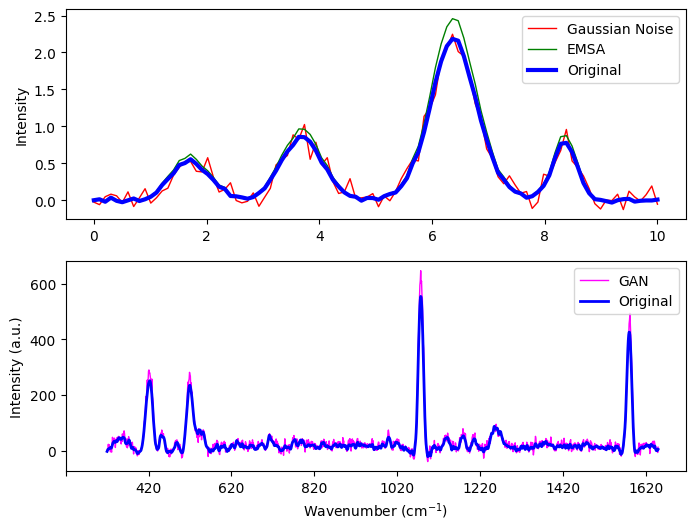

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def simulate_spectrum(num_points=100, num_peaks=5, noise_level=0.02):
    x = np.linspace(0, 10, num=num_points)
    y = np.zeros_like(x)

    rng = np.random.default_rng()
    peak_positions = rng.uniform(1, 9, num_peaks)
    peak_widths = rng.uniform(0.2, 0.5, num_peaks)
    peak_heights = rng.uniform(0.5, 1.5, num_peaks)

    for pos, width, height in zip(peak_positions, peak_widths, peak_heights):
        y += height * np.exp(-((x - pos) ** 2) / (2 * width ** 2))

    y += np.random.normal(0, noise_level, size=y.shape)

    return x, y

def add_gaussian_noise(data, mean=0, std=0.1):
    noise = np.random.normal(loc=mean, scale=std, size=data.shape)
    noisy_data = data + noise
    return noisy_data

def emsa(data, scale_range=(0.9, 1.1)):
    scale_factor = np.random.uniform(*scale_range)
    augmented_data = data * scale_factor
    return augmented_data

# Simulate an original spectrum
original_x, original_spectrum = simulate_spectrum()

# Create augmented versions of the spectrum
noisy_spectrum = add_gaussian_noise(original_spectrum, std=0.1)
emsa_spectrum = emsa(original_spectrum, scale_range=(0.8, 1.2))

# Load and prepare CSV data
ds = pd.read_csv('gan/forganbyepoch.csv', low_memory=False)

def filter_spectrum(name_filter):
    columns = ['multiname']
    x = ds[ds['multiname'] == name_filter]
    x = x.drop(columns, axis=1)
    x = x.iloc[:]
    return x.mean()

# Update the label names
names = ['10000 epochs', 'S protein']
colors = ['magenta', 'blue']

# Create the subplots
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# First subplot for simulated and augmented spectra
ax[0].plot(original_x, noisy_spectrum, label='Gaussian Noise', linestyle='-', linewidth=1, color='red')
ax[0].plot(original_x, emsa_spectrum, label='EMSA', linestyle='-', linewidth=1, color='green')
ax[0].plot(original_x, original_spectrum, label='Original', linewidth=3, color='blue')
ax[0].set_ylabel('Intensity')
ax[0].legend(loc='upper right')

# Second subplot for CSV data
for i, name in enumerate(names):
    x = filter_spectrum(name)
    if name == 'S protein':
        legend_label = 'Original'
        ax[1].plot(x.index, x.values, color=colors[i], linestyle='-', linewidth=2, label=legend_label)

    elif name == '10000 epochs':
        legend_label = 'GAN'
        ax[1].plot(x.index, x.values, color=colors[i], linestyle='-', linewidth=1, label=legend_label)


ax[1].set_xlabel("Wavenumber (cm$^{-1}$)")
ax[1].set_ylabel('Intensity (a.u.)')

# Set x-ticks at regular intervals of 200
start, end = ax[1].get_xlim()
xticks = np.arange(np.floor(start / 100) * 100, np.ceil(end / 100) * 100, 200)
# xticks = np.arange(321, 1622, 100)

ax[1].set_xticks(xticks)
ax[1].legend(loc='upper right', ncol=1)
plt.savefig('diagram/augmentation_gan_gaus_emsa.eps', bbox_inches='tight')
plt.show()


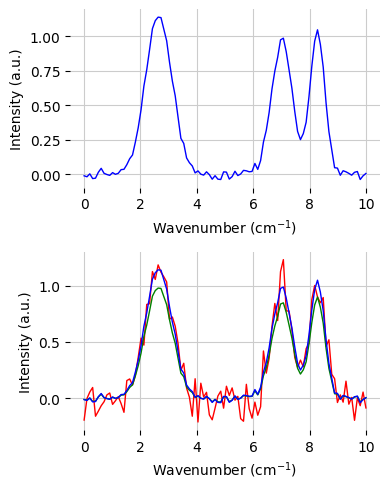

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def simulate_spectrum(num_points=100, num_peaks=3, noise_level=0.02):
    x = np.linspace(0, 10, num=num_points)
    y = np.zeros_like(x)

    rng = np.random.default_rng()
    peak_positions = rng.uniform(1, 9, num_peaks)
    peak_widths = rng.uniform(0.2, 0.5, num_peaks)
    peak_heights = rng.uniform(0.5, 1.5, num_peaks)

    for pos, width, height in zip(peak_positions, peak_widths, peak_heights):
        y += height * np.exp(-((x - pos) ** 2) / (2 * width ** 2))

    y += np.random.normal(0, noise_level, size=y.shape)

    return x, y

def add_gaussian_noise(data, mean=0, std=0.1):
    noise = np.random.normal(loc=mean, scale=std, size=data.shape)
    noisy_data = data + noise
    return noisy_data

def emsa(data, scale_range=(0.9, 1.1)):
    scale_factor = np.random.uniform(*scale_range)
    augmented_data = data * scale_factor
    return augmented_data

# Simulate an original spectrum
original_x, original_spectrum = simulate_spectrum()

# Create augmented versions of the spectrum
noisy_spectrum = add_gaussian_noise(original_spectrum, std=0.1)
emsa_spectrum = emsa(original_spectrum, scale_range=(0.8, 1.3))

# Load and prepare CSV data
# ds = pd.read_csv('gan/forganbyepoch.csv', low_memory=False)  # Assuming this is commented out as not needed for plotting

# Create the subplots
fig, ax = plt.subplots(2, 1, figsize=(4, 5))

# First subplot for simulated spectrum
ax[0].plot(original_x, original_spectrum, label='Original', linestyle='-', linewidth=1, color='blue')
ax[0].set_ylabel('Intensity (a.u.)')
ax[0].grid(True, color='#CCCCCC')
ax[0].set_xlabel("Wavenumber (cm$^{-1}$)")

# Remove plot borders for the first subplot
for spine in ax[0].spines.values():
    spine.set_visible(False)

# Second subplot for augmented spectra
ax[1].plot(original_x, noisy_spectrum, label='Gaussian Noise', linestyle='-', linewidth=1, color='red')
ax[1].plot(original_x, emsa_spectrum, label='EMSA', linestyle='-', linewidth=1, color='green')
ax[1].plot(original_x, original_spectrum, label='Original', linewidth=1, color='blue')
ax[1].set_ylabel('Intensity (a.u.)')
ax[1].grid(True, color='#CCCCCC')  # Enable grid for the second subplot
ax[1].set_xlabel("Wavenumber (cm$^{-1}$)")

# Remove plot borders for the second subplot
for spine in ax[1].spines.values():
    spine.set_visible(False)

# Add legends to plots
# Adjust layout to fit plots nicely
plt.tight_layout()

# Show the plot
plt.show()

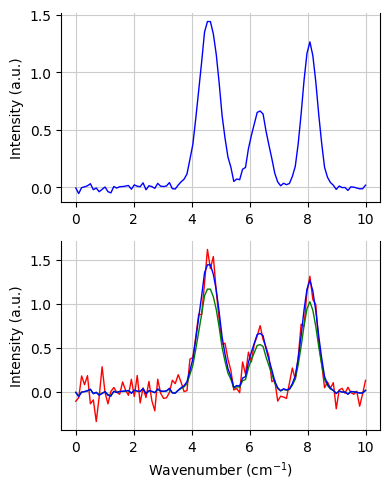

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def simulate_spectrum(num_points=100, num_peaks=3, noise_level=0.02):
    x = np.linspace(0, 10, num=num_points)
    y = np.zeros_like(x)

    rng = np.random.default_rng()
    peak_positions = rng.uniform(1, 9, num_peaks)
    peak_widths = rng.uniform(0.2, 0.5, num_peaks)
    peak_heights = rng.uniform(0.5, 1.5, num_peaks)

    for pos, width, height in zip(peak_positions, peak_widths, peak_heights):
        y += height * np.exp(-((x - pos) ** 2) / (2 * width ** 2))

    y += np.random.normal(0, noise_level, size=y.shape)

    return x, y

def add_gaussian_noise(data, mean=0, std=0.1):
    noise = np.random.normal(loc=mean, scale=std, size=data.shape)
    noisy_data = data + noise
    return noisy_data

def emsa(data, scale_range=(0.9, 1.1)):
    scale_factor = np.random.uniform(*scale_range)
    augmented_data = data * scale_factor
    return augmented_data

# Simulate an original spectrum
original_x, original_spectrum = simulate_spectrum()

# Create augmented versions of the spectrum
noisy_spectrum = add_gaussian_noise(original_spectrum, std=0.1)
emsa_spectrum = emsa(original_spectrum, scale_range=(0.8, 1.3))

# Load and prepare CSV data
# ds = pd.read_csv('gan/forganbyepoch.csv', low_memory=False)  # Assuming this is commented out as not needed for plotting

# Create the subplots
fig, ax = plt.subplots(2, 1, figsize=(4, 5))

# First subplot for simulated spectrum
ax[0].plot(original_x, original_spectrum, label='Original', linestyle='-', linewidth=1, color='blue')
ax[0].set_ylabel('Intensity (a.u.)')
ax[0].grid(True, color='#CCCCCC')

# Remove the top spine (the dark line on the top of the x-axis)
ax[0].spines['top'].set_visible(False)

# Second subplot for augmented spectra
ax[1].plot(original_x, noisy_spectrum, label='Gaussian Noise', linestyle='-', linewidth=1, color='red')
ax[1].plot(original_x, emsa_spectrum, label='EMSA', linestyle='-', linewidth=1, color='green')
ax[1].plot(original_x, original_spectrum, label='Original', linewidth=1, color='blue')
ax[1].set_ylabel('Intensity (a.u.)')
ax[1].grid(True, color='#CCCCCC')  # Enable grid for the second subplot

# Remove the top spine for the second subplot as well
ax[1].spines['top'].set_visible(False)

# Set x-axis labels for both subplots
ax[1].set_xlabel("Wavenumber (cm$^{-1}$)")

# Adjust layout to fit plots nicely
plt.tight_layout()

# Show the plot
plt.show()